<a href="https://colab.research.google.com/github/Haafidaa/dotfiles/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification

🎯 <b><u>Exercise objectives</u></b>
- Understand the *MNIST* dataset
- Design your first **Convolutional Neural Network** (*CNN*) and answer questions such as:
    - what are *Convolutional Layers*?
    - how many *parameters* are involved in such a layer?
- Train this CNN on images

🚀 <b><u>Let's get started!</u></b>

Imagine that we are  back in time into the 90's.
You work at a *Post Office* and you have to deal with an enormous amount of letters on a daily basis. How could you automate the process of reading the ZIP Codes, which are a combination of 5 handwritten digits?

This task, called the **Handwriting Recognition**, used to be a very complex problem back in those days. It was solved by *Bell Labs* (among others) where one of the Deep Learning gurus, [*Yann Le Cun*](https://en.wikipedia.org/wiki/Yann_LeCun), used to work.

From [Wikipedia](https://en.wikipedia.org/wiki/Handwriting_recognition):

> Handwriting recognition (HWR), also known as Handwritten Text Recognition (HTR), is the ability of a computer to receive and interpret intelligible handwritten input from sources such as paper documents, photographs, touch-screens and other devices

![Number recognition](recognition.gif)

*Note: The animation above is just here to help you visualize what happens with the different images: <br/> $\rightarrow$ For each image, once the CNN is trained, it will predict what digit is written. The inputs are the different digits and not one animation/video!*

🤔 <b><u>How does this CNN work ?</u></b>

- *Inputs*: Images (_each image shows a handwritten digit_)
- *Target*: For each image, you want your CNN model to predict the correct digit (between 0 and 9)
    - It is a **multi-class classification** task (more precisely a 10-class classification task since there are 10 different digits).

🔢 To improve the capacity of the Convolutional Neural Network to read these numbers, we need to feed it with many images representing handwritten digits. This is why the 📚 [**MNIST dataset**](http://yann.lecun.com/exdb/mnist/) *(Mixed National Institute of Standards and Technology)* was created.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## (1) The `MNIST` Dataset

📚 Tensorflow/Keras offers multiple [**datasets**](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) to play with:
- *Vectors*: `boston_housing` (regression)
- *Images* : `mnist`, `fashion_mnist`, `cifar10`, `cifar100` (classification)
- *Texts*: `imbd`, `reuters` (classification/sentiment analysis)


💾 You can **load the MNIST dataset** with the following commands:

In [3]:
from tensorflow.keras import datasets


# Loading the MNIST Dataset...
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

# The train set contains 60 000 images, each of them of size 28x28
# The test set contains 10 000 images, each of them of size 28x28
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


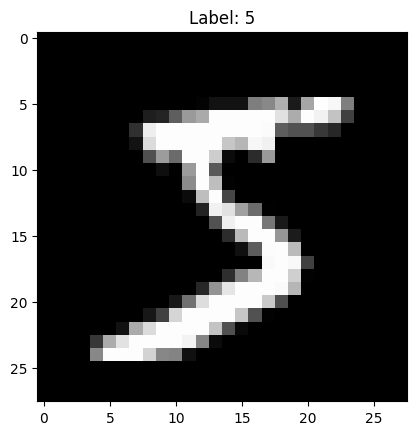

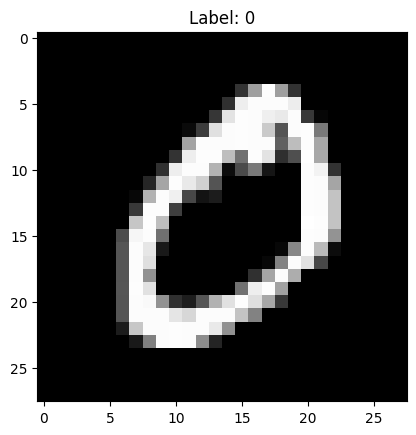

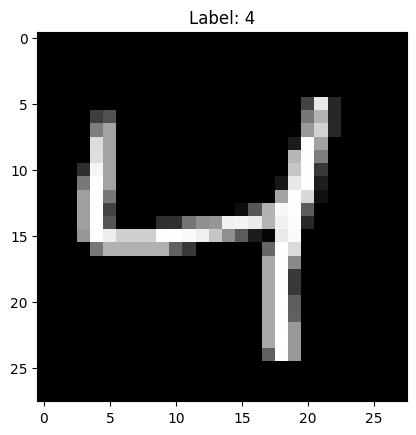

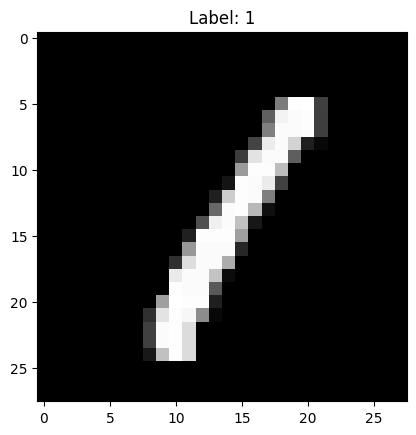

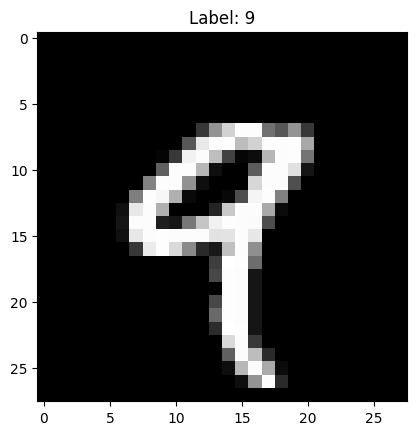

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets


# Afficher les formes des datasets
print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

# Afficher quelques images du dataset d'entraînement
for i in range(5):
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.show()


### (1.1) Exploring the dataset

❓ **Question: Let's have look at some handwritten digits of this MNIST dataset.** ❓

🖨 Print some images from the *train set*.

<details>
    <summary><i>Hints</i></summary>

💡*Hint*: use the `imshow` function from `matplotlib` with `cmap = "gray"`

🤨 Note: if you don't specify this *cmap* argument, the weirdly displayed colors are just Matplotlib defaults...
    
</details>

### (1.2) Image Preprocessing

❗️ **Neural Networks converge faster when the input data is somehow normalized** ❗️

👩🏻‍🏫 How do we proceed for Convolutional Neural Networks ?
* The `RBG` intensities are coded between 0 and 255.
* We can simply divide the input data by the maximal value 255 to have all the pixels' intensities between 0 and 1 😉

❓ **Question ❓ As a first preprocessing step, please normalize your data.**

Don't forget to do it both on your train data and your test data.

(*Note: you can also center your data, by subtracting 0.5 from all the values, but it is not mandatory*)

In [5]:
# Normaliser les données d'entraînement et de test
X_train = X_train / 255.0
X_test = X_test / 255.0

# Vérifier les nouvelles valeurs min et max
print("Valeurs des pixels après normalisation :")
print(f"Train - Min: {X_train.min()}, Max: {X_train.max()}")
print(f"Test - Min: {X_test.min()}, Max: {X_test.max()}")


Valeurs des pixels après normalisation :
Train - Min: 0.0, Max: 1.0
Test - Min: 0.0, Max: 1.0


In [6]:
# YOUR CODE HERE

### (1.3) Inputs' dimensionality

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


👆 Remember that you have 60,000 training images and 10,000 test images, each of size $(28, 28)$. However...

> ❗️  **`Convolutional Neural Network models need to be fed with images whose last dimension is the number of channels`.**  

> 🧑🏻‍🏫 The shape of tensors fed into ***ConvNets*** is the following: `(NUMBER_OF_IMAGES, HEIGHT, WIDTH, CHANNELS)`

🕵🏻This last dimension is clearly missing here. Can you guess the reason why?
<br>
<details>
    <summary><i>Answer<i></summary>
        
* All these $60000$ $ (28 \times 28) $ pictures are black-and-white $ \implies $ Each pixel lives on a spectrum from full black (0) to full white (1).
        
    * Theoretically, you don't need to know the number of channels for a black-and-white picture since there is only 1 channel (the "whiteness" of "blackness" of a pixel). However, it is still mandatory for the model to have this number of channels explicitly stated.
        
    * In comparison, colored pictures need multiple channels:
        - the RGB system with 3 channels (<b><span style="color:red">Red</span> <span style="color:green">Green</span> <span style="color:blue">Blue</span></b>)
        - the CYMK system  with 4 channels (<b><span style="color:cyan">Cyan</span> <span style="color:magenta">Magenta</span> <span style="color:yellow">Yellow</span> <span style="color:black">Black</span></b>)
        
        
</details>        

❓ **Question: expanding dimensions** ❓

* Use the **`expand_dims`** to add one dimension at the end of the training data and test data.

* Then, print the shapes of `X_train` and `X_test`. They should respectively be equal to $(60000, 28, 28, 1)$ and $(10000, 28, 28, 1)$.

In [8]:
from tensorflow.keras.backend import expand_dims

In [9]:

# Ajouter une dimension pour les canaux
X_train = expand_dims(X_train, axis=-1)
X_test = expand_dims(X_test, axis=-1)

# Vérifier les nouvelles formes des datasets
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


### (1.4) Target encoding

One more thing to do for a multiclass classification task in Deep Leaning:

👉 _"one-hot-encode" the categories*_

❓ **Question: encoding the labels** ❓

* Use **`to_categorical`** to transform your labels.
* Store the results into two variables that you can call **`y_train_cat`** and **`y_test_cat`**.

In [10]:
from tensorflow.keras.utils import to_categorical

# Encoder les étiquettes
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Vérifier les nouvelles formes des étiquettes
print(y_train_cat.shape)
print(y_test_cat.shape)


(60000, 10)
(10000, 10)


In [11]:
# Quick check that you correctly used to_categorical
assert(y_train_cat.shape == (60000,10))
assert(y_test_cat.shape == (10000,10))

The data is now ready to be used. ✅

## (2) The Convolutional Neural Network

### (2.1) Architecture and compilation of a CNN


❓ **Question: CNN Architecture and compilation** ❓

Now, let's build a <u>Convolutional Neural Network</u> that has:


- a `Conv2D` layer with 8 filters, each of size $(4, 4)$, an input shape suitable for your task, the `relu` activation function, and `padding='same'`
- a `MaxPool2D` layer with a `pool_size` equal to $(2, 2)$
- a second `Conv2D` layer with 16 filters, each of size $(3, 3)$, and the `relu` activation function
- a second `MaxPool2D` layer with a `pool_size` equal to $(2, 2)$


- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the `relu` activation function
- a last (predictive) layer that is suited for your task

In the function that initializes this model, do not forget to include the <u>compilation of the model</u>, which:
* optimizes the `categorical_crossentropy` loss function,
* with the `adam` optimizer,
* and the `accuracy` as the metrics

(*Note: you could add more classification metrics if you want but the dataset is well balanced!*)

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models


def initialize_model():

    model = models.Sequential()

from tensorflow.keras import layers, models

def initialize_model():
    model = models.Sequential()

    # Première Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4, 4), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Deuxième Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten
    model.add(layers.Flatten())

    # Couche Fully Connected
    model.add(layers.Dense(10, activation='relu'))

    # Dernière couche - Couche de Classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compilation du modèle
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Initialiser le modèle
model = initialize_model()
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 8)           │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           5,770 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,184 (28.06 KB)

 Trainable params: 7,184 (28.06 KB)

 Non-trainable params: 0 (0.00 B)

❓ **Question: number of trainable parameters in a convolutional layer** ❓

How many trainable parameters are there in your model?
1. Compute them with ***model.summary( )*** first
2. Recompute them manually to make sure you properly understood ***what influences the number of weights in a CNN***.

Conv2D (8 filtres de taille 4x4)

Paramètres = (Taille du Filtre \* Canaux d'Entrée + Biais) \* Nombre de Filtres

= (4\4\1 + 1) \* 8 = 136

MaxPooling2D (2x2)

Pas de paramètres à apprendre, donc 0.

Conv2D (16 filtres de taille 3x3)

Paramètres = (Taille du Filtre \* Canaux d'Entrée + Biais) \* Nombre de Filtres

= (3\3\8 + 1) \* 16 = 1,168

MaxPooling2D (2x2)

Pas de paramètres à apprendre, donc 0.

Flatten

Transforme (6, 6, 16) en un vecteur 1D de taille 576, mais pas de paramètres à apprendre.

Dense (10 neurones)

Paramètres = (Nombre de Neurones de la Couche Précédente + Biais) \* Nombre de Neurones

= (576 + 1) \* 10 = 5,770

Dense (10 neurones pour la classification)

Paramètres = (10 + 1) \* 10 = 110

Total des Paramètres
Total = 136 + 0 + 1,168 + 0 + 0 + 5,770 + 110 = 7,184

In [13]:
# YOUR CODE HERE

### (2.2) Training a CNN

❓ **Question: training a CNN** ❓

Initialize your model and fit it on the train data.
- Do not forget to use a **Validation Set/Split** and an **Early Stopping criterion**.
- Limit yourself to 5 epochs max in this challenge, just to save some precious time for the more advanced challenges!

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Définir l'arrêt précoce
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle avec verbose=1
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.3, callbacks=[es], verbose=1)

# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f'Précision sur les données de test : {test_acc:.4f}')



Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accuracy: 0.9853 - val_loss: 0.0492
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9920 - loss: 0.0240 - val_accuracy: 0.9868 - val_loss: 0.0453
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9853 - val_loss: 0.0499
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9843 - val_loss: 0.0534
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9854 - val_loss: 0.0503
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0171 - val_accuracy: 0.9858 - val_loss: 0.0507
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9939 - loss: 0.0170 - val_accuracy: 0.9789 - val_loss: 0.0788
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9826 - loss: 0.0523
Précision sur l

❓ **Question: How many iterations does the CNN perform per epoch** ❓

_Note: it has nothing to do with the fact that this is a CNN. This is related to the concept of forward/backward propagation already covered during the previous lecture on optimizers, fitting, and losses 😉_

> YOUR ANSWER HERE

<details>
    <summary><i>Answer</i></summary>

With `verbose = 1` when fitting your model, you have access to crucial information about your training procedure.
    
Remember that we've just trained our CNN model on $60000$ training images

If the chosen batch size is 32:

* For each epoch, we have $ \large \lceil \frac{60000}{32} \rceil = 1875$ minibatches <br/>
* The _validation_split_ is equal to $0.3$ - which means that within one single epoch, there are:
    * $ \lceil 1875 \times (1 - 0.3) \rceil = \lceil 1312.5 \rceil = 1313$ batches are used to compute the `train_loss`
    * $ 1875 - 1312 = 562 $ batches are used to compute the `val_loss`
    * **The parameters are updated 1313 times per epoch** as there are 1313 forward/backward propagations per epoch !!!


👉 With so many updates of the weights within one epoch, you can understand why this CNN model converges even with a limited number of epochs.

</details>    


### (2.3) Evaluating its performance

❓ **Question: Evaluating your CNN** ❓

What is your **`accuracy on the test set?`**

In [15]:
# YOUR CODE HERE

🎉 You should already be impressed by your CNN skills! Reaching over 95% accuracy!

🔥 You solved what was a very hard problem 30 years ago with your own CNN.

🏁 **Congratulations!**

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!